<h1><div align="center">Deep Learning From Scratch</div></h1>
<h2><div align="center">Linear Regression</div></h2>
<div align="center">Bruno Gonçalves</div>
<div align="center"><a href="http://www.data4sci.com/">www.data4sci.com</a></div>
<div align="center">@bgoncalves</div>

In [13]:
import numpy as np
import matplotlib.pyplot as plt

import watermark

%load_ext watermark
%matplotlib inline

The watermark extension is already loaded. To reload it, use:
  %reload_ext watermark


In [16]:
%watermark -n -v -m -p numpy,matplotlib

Thu Apr 18 2019 

CPython 3.7.3
IPython 7.4.0

numpy 1.16.2
matplotlib 3.0.3

compiler   : Clang 4.0.1 (tags/RELEASE_401/final)
system     : Darwin
release    : 18.2.0
machine    : x86_64
processor  : i386
CPU cores  : 8
interpreter: 64bit


In [32]:
data = np.array(np.loadtxt("data/Anscombe1.dat"))

In [33]:
print(data)

[[10.    8.04]
 [ 8.    6.95]
 [13.    7.58]
 [ 9.    8.81]
 [11.    8.33]
 [14.    9.96]
 [ 6.    7.24]
 [ 4.    4.26]
 [12.   10.84]
 [ 7.    4.82]
 [ 5.    5.68]]


In [35]:
X = data[:, 0].reshape(-1, 1)
y = data[:, 1].reshape(-1, 1)

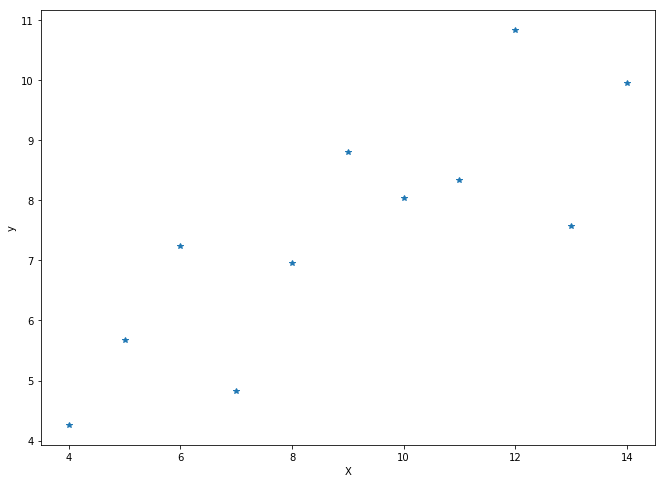

In [36]:
plt.plot(X, y, '*')
plt.xlabel('X')
plt.ylabel('y')
plt.gcf().set_size_inches(11, 8)

Get matrix dimensions and add the bias column

In [37]:
M, N = X.shape
X = np.concatenate((np.ones((M, 1)), X), axis=1) #Add x0

In [39]:
print(X)

[[ 1. 10.]
 [ 1.  8.]
 [ 1. 13.]
 [ 1.  9.]
 [ 1. 11.]
 [ 1. 14.]
 [ 1.  6.]
 [ 1.  4.]
 [ 1. 12.]
 [ 1.  7.]
 [ 1.  5.]]


Set the training parameters and initialize the weight matrix

In [70]:
alpha = 0.01
epsilon = 0.12

weights = 2*np.random.rand(N+1, 1)*epsilon - epsilon
count = 0

## Training Procedure

In [69]:
oldJ = 0
err = 1

Js = []

while err > 1e-6:
    Hs = np.dot(X, weights)
    deltas = alpha/M*np.dot(X.T, (Hs-y))

    count += 1
    weights -= deltas

    J = np.sum(np.power(Hs-y, 2.))/(2*M)
    Js.append(J)
    err = np.abs(oldJ-J)
    oldJ = J
    
    if count % 100 == 0:
        print(count, J, err, weights.flatten())

print(count, J, err, weights.flatten())

100 0.9722496188864551 0.0007557624926656237 [0.49097813 0.74854204]
200 0.9044101228293006 0.0006078693019188064 [0.74983133 0.72291052]
300 0.8498459607929708 0.0004889169438825336 [0.98197987 0.69992328]
400 0.8059593172922792 0.0003932420624980226 [1.19017875 0.67930753]
500 0.7706607365778102 0.0003162895490790296 [1.37689875 0.66081861]
600 0.7422696430453037 0.0002543956722756979 [1.54435574 0.6442371 ]
700 0.7194343285466354 0.00020461364677160088 [1.69453699 0.62936622]
800 0.7010675971751906 0.0001645733359791901 [1.82922476 0.61602951]
900 0.6862950035553192 0.00013236840915886727 [1.95001743 0.60406867]
1000 0.6744132202458962 0.00010646558046023546 [2.0583485  0.59334178]
1100 0.6648565521180893 8.563160874042186e-05 [2.15550357 0.58372154]
1200 0.6571700034471825 6.887458260040891e-05 [2.24263562 0.57509376]
1300 0.6509876154349522 5.53966951939433e-05 [2.32077867 0.56735608]
1400 0.6460150428057777 4.4556260416439564e-05 [2.39086007 0.56041665]
1500 0.6420155399432104 3.

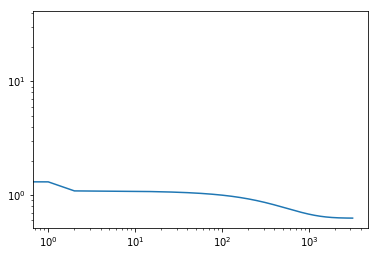

In [11]:
plt.loglog(Js)

In [27]:
weights.flatten()

array([2.90885548, 0.509125  ])

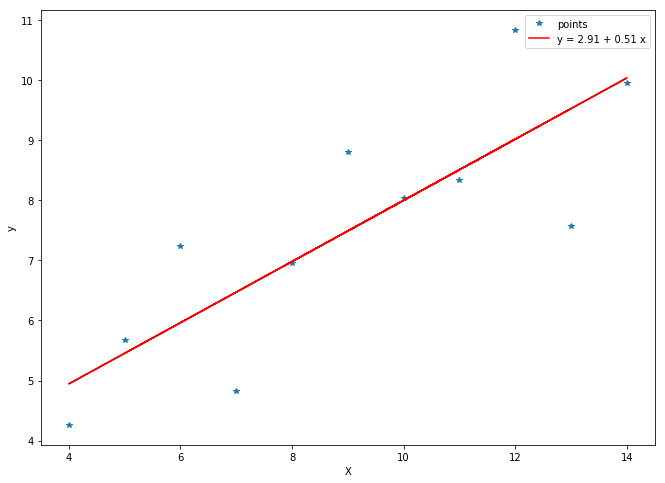

In [64]:
plt.plot(X.T[1], y, '*', label='points')
plt.plot(X.T[1], np.dot(X, weights.flatten()), 'r-', label='y = %2.2f + %2.2f x' % tuple(weights.flatten()))
plt.xlabel('X')
plt.ylabel('y')
plt.legend()
plt.gcf().set_size_inches(11, 8)